<h1>Handwriting recognition with Keras</h1>

In [6]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

load dataset:

In [7]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
# Normalize
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

# convert labels
train_labels =keras.utils.to_categorical(mnist_train_labels,10)
test_labels =keras.utils.to_categorical(mnist_test_labels,10)

See sample data

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


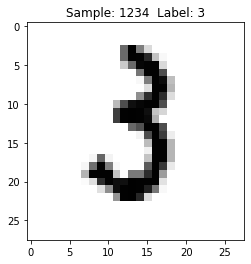

In [4]:
import matplotlib.pyplot as plt
def display_sample(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis=0)
    image =  train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d'% (num,label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
display_sample(1234)

<h2>Constructing the NN</h2>

In [10]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Add optimizer and loss function

In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

Train model

In [15]:
history = model.fit(train_images, train_labels,
                   batch_size=100,
                   epochs=10,
                   verbose=2,
                   validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 23s - loss: 0.2365 - acc: 0.9315 - val_loss: 0.1158 - val_acc: 0.9662
Epoch 2/10
 - 6s - loss: 0.0967 - acc: 0.9709 - val_loss: 0.0891 - val_acc: 0.9730
Epoch 3/10
 - 6s - loss: 0.0649 - acc: 0.9804 - val_loss: 0.0783 - val_acc: 0.9773
Epoch 4/10
 - 5s - loss: 0.0474 - acc: 0.9860 - val_loss: 0.0723 - val_acc: 0.9787
Epoch 5/10
 - 5s - loss: 0.0349 - acc: 0.9896 - val_loss: 0.0755 - val_acc: 0.9787
Epoch 6/10
 - 6s - loss: 0.0271 - acc: 0.9920 - val_loss: 0.0675 - val_acc: 0.9794
Epoch 7/10
 - 6s - loss: 0.0210 - acc: 0.9936 - val_loss: 0.0655 - val_acc: 0.9815
Epoch 8/10
 - 6s - loss: 0.0159 - acc: 0.9952 - val_loss: 0.0805 - val_acc: 0.9786
Epoch 9/10
 - 6s - loss: 0.0123 - acc: 0.9963 - val_loss: 0.0665 - val_acc: 0.9812
Epoch 10/10
 - 6s - loss: 0.0098 - acc: 0.9974 - val_loss: 0.0749 - val_acc: 0.9819


In [17]:
score = model.evaluate(test_images, test_labels, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07486143680309287
Test accuracy: 0.9819


Visualize the wrong ones

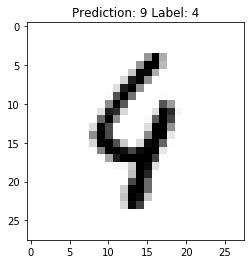

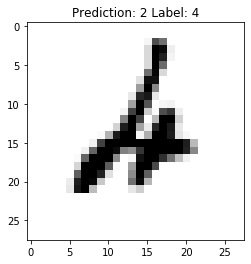

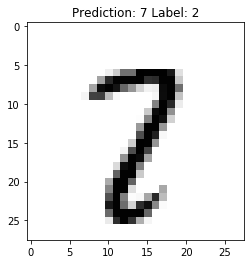

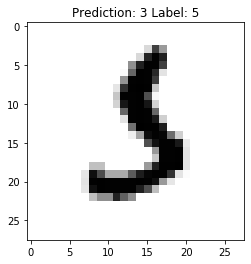

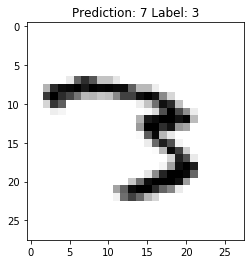

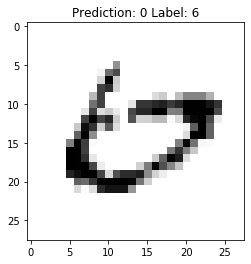

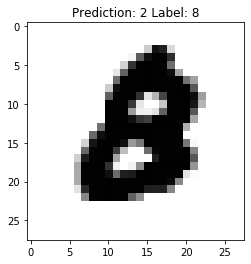

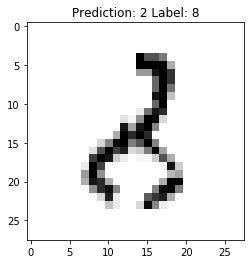

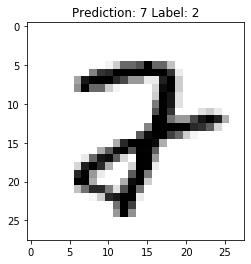

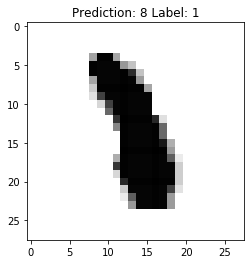

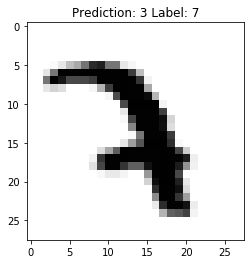

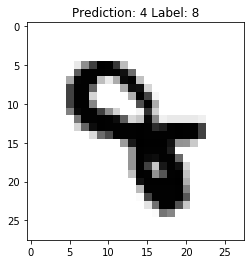

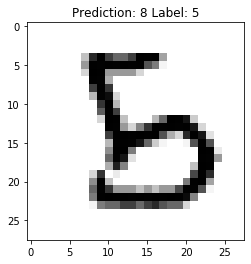

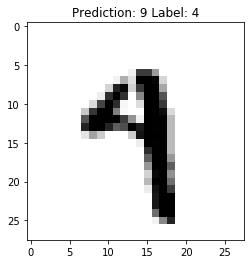

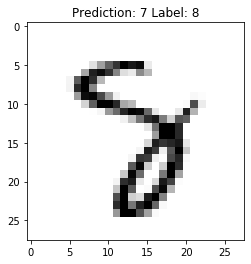

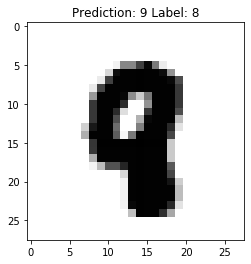

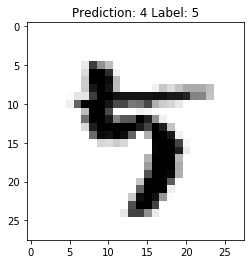

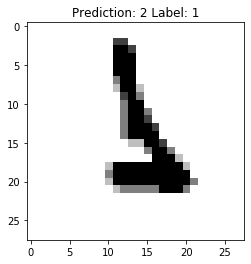

In [18]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat= model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if predicted_cat != label:
        plt.title('Prediction: %d Label: %d'% (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()